2. Zadatak: Statističke analize uzorka podataka
- Za svaku kategoričku varijablu prikazati distribucija frekvencije u grafu 
- Za svaku kontinuiranu varijablu izračunati srednju vrijednost, z vrijednosti, zaobljenost distribucije, nagnutost distribucije
- Izračunati korelacije svake varijable sa ciljnom varijablom
- Izračunati korelacije svake varijable izražene kroz Z vrijednost i  kategorizirane u razrede <-3 , (-3 do 3),>3 s ciljnom varijablom
- Objasniti što ste spoznali vezano uz promatrani skup podataka  temeljem analiza iz točke 2
- Objasniti / komentirati nalaze
- Sve mora biti vidljivo u Jupyter Notebooku, kod i rezultati,  kao i komentari


---

## 1. Učitavanje potrebnih biblioteka i učitavanje podataka

Prvo ćemo učitati sve potrebne biblioteke za analizu podataka:

In [ ]:
# Učitavanje potrebnih biblioteka
import pandas as pd         
import numpy as np           

# Prikaži verzije biblioteka
print("Verzije biblioteka:")
print(f"Pandas: {pd.__version__}")
print(f"NumPy: {np.__version__}")

# Učitavanje podataka iz CSV datoteke iz dataset mape
# read_csv je standardna Pandas funkcija za učitavanje podataka iz CSV formata
df = pd.read_csv('../dataset/student-por.csv', sep=';')

print("Datoteka uspješno učitana!")
print(f"\nDimenzije datoteke: {df.shape}")
print(f"  - Broj redaka (zapisa): {df.shape[0]}")
print(f"  - Broj stupaca (atributa): {df.shape[1]}")

Verzije biblioteka:
Pandas: 2.3.3
NumPy: 2.4.0
Datoteka uspješno učitana!

Dimenzije datoteke: (649, 33)
  - Broj redaka (zapisa): 649
  - Broj stupaca (atributa): 33


---

## 2. Distribucija frekvencija za kategoričke varijable

**Cilj:** Vizualno identificirati zastupljenost pojedinih kategorija u uzorku (poput `Mjob`, `Fjob`, `school`, itd.).

**Metodologija:**
- Kategoričke varijable su one koje imaju ograničen broj mogućih vrijednosti (npr. tip škole, posao roditelja)
- Koristimo `value_counts()` za prebrojavanje svake kategorije
- Vizualiziramo stupčastim dijagramom (`bar chart`) za jednostavniju interpretaciju

**Doprinos analizi:**
- Omogućuje razumijevanje strukture uzorka
- Identificira dominantne kategorije koje mogu utjecati na rezultate
- Otkriva potencijalne neravnoteže u podacima (npr. ako većina učenika dolazi iz jedne škole)


Kategoričke varijable u datasetu:
['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

Ukupno kategoričkih varijabli: 17


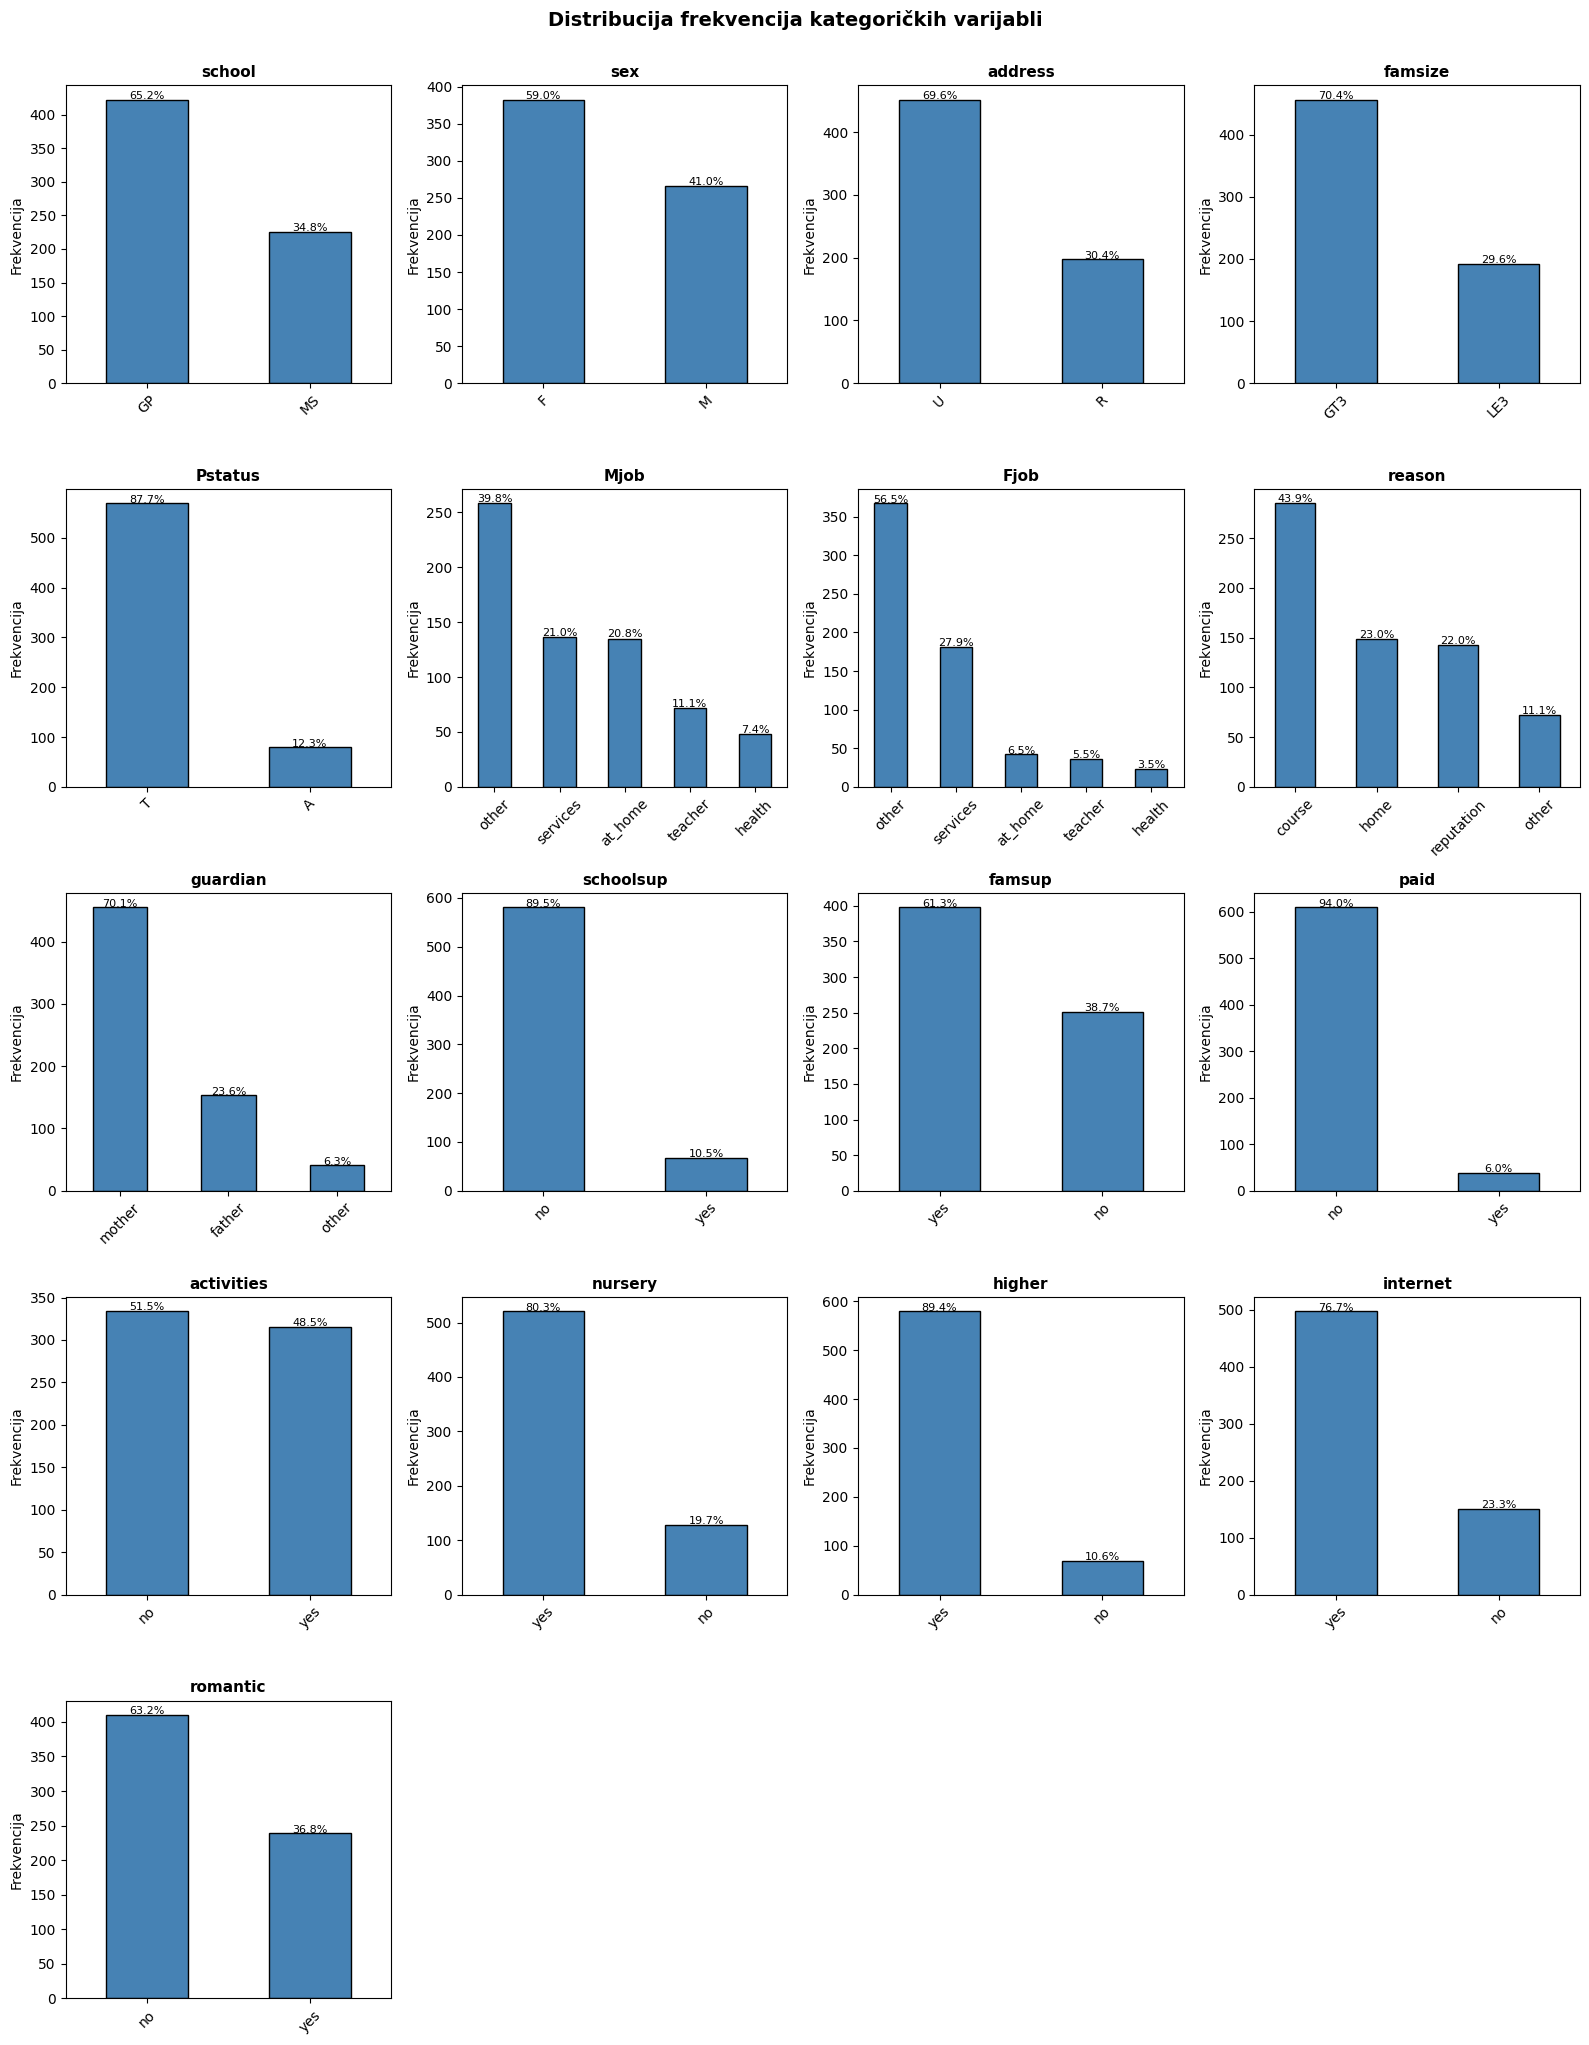

In [3]:
import matplotlib.pyplot as plt
import math

# Omogući prikaz grafova u Jupyter Notebooku
%matplotlib inline

# Identificiraj kategoričke stupce (tip 'object' u Pandas-u)
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

print("Kategoričke varijable u datasetu:")
print(categorical_columns)
print(f"\nUkupno kategoričkih varijabli: {len(categorical_columns)}")

# Dinamički izračunaj potrebnu veličinu grida
n_cols = 4
n_rows = math.ceil(len(categorical_columns) / n_cols)

# Kreiraj stupčaste dijagrame za svaku kategoričku varijablu
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    # Prebrojimo vrijednosti i sortiramo ih po frekvenciji
    value_counts = df[col].value_counts()
    
    # Crtamo stupčasti dijagram
    value_counts.plot(kind='bar', ax=axes[i], color='steelblue', edgecolor='black')
    axes[i].set_title(f'{col}', fontsize=11, fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frekvencija')
    axes[i].tick_params(axis='x', rotation=45)
    
    # Dodaj postotke iznad stupaca
    total = len(df)
    for j, v in enumerate(value_counts):
        percentage = (v / total) * 100
        axes[i].text(j, v + 1, f'{percentage:.1f}%', ha='center', fontsize=8)

# Sakrij prazne subplotove ako ih ima
for j in range(len(categorical_columns), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.suptitle('Distribucija frekvencija kategoričkih varijabli', fontsize=14, fontweight='bold', y=1.02)
plt.show()

---

## 3. Deskriptivna statistika kontinuiranih varijabli

**Cilj:** Izraditi "osobnu kartu" distribucije numeričkih podataka (npr. `absences`, `age`, `failures`).

**Napomena:** Ovdje prikazujemo statistiku za SVE numeričke varijable uključujući G1, G2, G3 kako bismo razumjeli distribuciju ocjena. Međutim, u korelacijskoj analizi (sekcija 4) G1, G2, G3 će biti **isključeni** jer:
- G1 je izvor ciljne varijable (data leakage)
- G2 i G3 nastaju vremenski NAKON G1

**Statistički pokazatelji koje računamo:**

1. **Srednja vrijednost (Mean)** - Centar distribucije, prosječna vrijednost svih podataka

2. **Z-vrijednosti** - Standardizirano odstupanje od prosjeka (formula: z = (x - mean) / std)

3. **Zaobljenost (Kurtosis)** - Mjeri "šiljatost" distribucije (>3 šiljatija, <3 plosnatija)

4. **Nagnutost (Skewness)** - Mjeri simetričnost distribucije (0 simetrija, >0 udesno, <0 ulijevo)

**Doprinos analizi:**
- Otkriva jesu li podaci homogeni ili jako raspršeni
- Identificira varijable s ekstremnim vrijednostima (outlierima)
- Pomaže razumjeti prirodu svake numeričke varijable


In [7]:
from scipy import stats

# Identificiraj numeričke stupce
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

print("Numeričke (kontinuirane) varijable u datasetu:")
print(numeric_columns)
print(f"\nUkupno numeričkih varijabli: {len(numeric_columns)}")

# Kreiraj DataFrame s deskriptivnom statistikom
descriptive_stats = pd.DataFrame({
    'Varijabla': numeric_columns,
    'Srednja vrijednost': [df[col].mean() for col in numeric_columns],
    'Std. devijacija': [df[col].std() for col in numeric_columns],
    'Min': [df[col].min() for col in numeric_columns],
    'Max': [df[col].max() for col in numeric_columns],
    'Median': [df[col].median() for col in numeric_columns],
    'Kurtosis': [df[col].kurt() for col in numeric_columns],
    'Skewness': [df[col].skew() for col in numeric_columns]
})

# Postavi varijablu kao indeks za bolju čitljivost
descriptive_stats = descriptive_stats.set_index('Varijabla')

print("\n" + "="*80)
print("DESKRIPTIVNA STATISTIKA KONTINUIRANIH VARIJABLI")
print("="*80)
display(descriptive_stats.round(3))

# Izračunaj Z-vrijednosti za sve numeričke stupce
print("\n" + "="*80)
print("Z-VRIJEDNOSTI (prvih 10 redaka)")
print("="*80)

# Kreiraj novi DataFrame sa Z-vrijednostima
df_z = pd.DataFrame()
for col in numeric_columns:
    mean_val = df[col].mean()
    std_val = df[col].std()
    df_z[f'{col}_Z'] = (df[col] - mean_val) / std_val

display(df_z.head(10).round(3))

# Interpretacija Kurtosis i Skewness
print("\n" + "="*80)
print("INTERPRETACIJA STATISTIČKIH POKAZATELJA")
print("="*80)

for col in numeric_columns:
    kurt = df[col].kurt()
    skew = df[col].skew()
    
    # Interpretacija Kurtosis
    if kurt > 3:
        kurt_interp = "šiljatija od normalne (više ekstrema)"
    elif kurt < 3:
        kurt_interp = "plosnatija od normalne"
    else:
        kurt_interp = "približno normalna"
    
    # Interpretacija Skewness
    if abs(skew) < 0.5:
        skew_interp = "približno simetrična"
    elif skew > 0:
        skew_interp = "nagnuta udesno (većina niskih vrijednosti)"
    else:
        skew_interp = "nagnuta ulijevo (većina visokih vrijednosti)"
    
    print(f"\n{col}:")
    print(f"   Kurtosis: {kurt:.3f} → {kurt_interp}")
    print(f"   Skewness: {skew:.3f} → {skew_interp}")


Numeričke (kontinuirane) varijable u datasetu:
['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

Ukupno numeričkih varijabli: 16

DESKRIPTIVNA STATISTIKA KONTINUIRANIH VARIJABLI


,Srednja vrijednost,Std. devijacija,Min,Max,Median,Kurtosis,Skewness
Varijabla,,,,,,,
age,16.744,1.218,15,22,17.0,0.072,0.417
Medu,2.515,1.135,0,4,2.0,-1.261,-0.030
Fedu,2.307,1.100,0,4,2.0,-1.109,0.215
traveltime,1.569,0.749,1,4,1.0,1.109,1.248
studytime,1.931,0.830,1,4,2.0,0.038,0.700
failures,0.222,0.593,0,3,0.0,9.824,3.093
famrel,3.931,0.956,1,5,4.0,1.349,-1.106
freetime,3.180,1.051,1,5,3.0,-0.397,-0.181
goout,3.185,1.176,1,5,3.0,-0.865,-0.009



Z-VRIJEDNOSTI (prvih 10 redaka)


,age_Z,Medu_Z,Fedu_Z,traveltime_Z,studytime_Z,failures_Z,famrel_Z,freetime_Z,goout_Z,Dalc_Z,Walc_Z,health_Z,absences_Z,G1_Z,G2_Z,G3_Z
0,1.031,1.309,1.540,0.576,0.084,-0.374,0.073,-0.172,0.693,-0.543,-0.997,-0.371,0.073,-4.152,-0.196,-0.280
1,0.210,-1.335,-1.188,-0.759,0.084,-0.374,1.119,-0.172,-0.157,-0.543,-0.997,-0.371,-0.358,-0.874,-0.196,-0.280
2,-1.432,-1.335,-1.188,-0.759,0.084,-0.374,0.073,-0.172,-1.008,0.538,0.560,-0.371,0.504,0.219,0.491,0.029
3,-1.432,1.309,-0.279,-0.759,1.289,-0.374,-0.974,-1.123,-1.008,-0.543,-0.997,1.012,-0.789,0.947,0.834,0.648
4,-0.611,0.428,0.630,-0.759,0.084,-0.374,0.073,-0.172,-1.008,-0.543,-0.218,1.012,-0.789,-0.145,0.491,0.339
5,-0.611,1.309,0.630,-0.759,0.084,-0.374,1.119,0.780,-1.008,-0.543,-0.218,1.012,0.504,0.219,0.148,0.339
6,-0.611,-0.454,-0.279,-0.759,0.084,-0.374,0.073,0.780,0.693,-0.543,-0.997,-0.371,-0.789,0.583,0.148,0.339
7,0.210,1.309,1.540,0.576,0.084,-0.374,0.073,-2.074,0.693,-0.543,-0.997,-1.754,-0.358,-0.510,0.491,0.339
8,-1.432,0.428,-0.279,-0.759,0.084,-0.374,0.073,-1.123,-1.008,-0.543,-0.997,-1.754,-0.789,1.312,1.520,1.577
9,-1.432,0.428,1.540,-0.759,0.084,-0.374,1.119,1.731,-1.858,-0.543,-0.997,1.012,-0.789,0.219,0.148,0.339



INTERPRETACIJA STATISTIČKIH POKAZATELJA

age:
   Kurtosis: 0.072 → plosnatija od normalne
   Skewness: 0.417 → približno simetrična

Medu:
   Kurtosis: -1.261 → plosnatija od normalne
   Skewness: -0.030 → približno simetrična

Fedu:
   Kurtosis: -1.109 → plosnatija od normalne
   Skewness: 0.215 → približno simetrična

traveltime:
   Kurtosis: 1.109 → plosnatija od normalne
   Skewness: 1.248 → nagnuta udesno (većina niskih vrijednosti)

studytime:
   Kurtosis: 0.038 → plosnatija od normalne
   Skewness: 0.700 → nagnuta udesno (većina niskih vrijednosti)

failures:
   Kurtosis: 9.824 → šiljatija od normalne (više ekstrema)
   Skewness: 3.093 → nagnuta udesno (većina niskih vrijednosti)

famrel:
   Kurtosis: 1.349 → plosnatija od normalne
   Skewness: -1.106 → nagnuta ulijevo (većina visokih vrijednosti)

freetime:
   Kurtosis: -0.397 → plosnatija od normalne
   Skewness: -0.181 → približno simetrična

goout:
   Kurtosis: -0.865 → plosnatija od normalne
   Skewness: -0.009 → približno

---

## 4. Korelacija varijabli s ciljnom varijablom (G1 <= 10)

**Cilj:** Utvrditi snagu i smjer linearne povezanosti prediktora s binarnim ciljem (pad na ocjeni G1).

**Definicija ciljne varijable:**
- `target_G1 = 1` ako je G1 <= 10 (učenik je pao)
- `target_G1 = 0` ako je G1 > 10 (učenik je položio)

**Interpretacija korelacije:**
- Koeficijenti su između -1 i 1
- **Pozitivna korelacija:** Rast varijable povećava vjerojatnost pada (npr. alkohol)
- **Negativna korelacija:** Rast varijable smanjuje vjerojatnost pada (npr. studytime)
- **Blizu 0:** Nema značajne linearne povezanosti

**Doprinos analizi:**
- Identificira faktore rizika za pad
- Pomaže u odabiru varijabli za prediktivno modeliranje
- Otkriva neočekivane veze između varijabli


Distribucija ciljne varijable (target_G1):
target_G1
0    397
1    252
Name: count, dtype: int64

Postotak učenika s padom (G1 <= 10): 38.8%

Broj validnih prediktora (bez G1, G2, G3): 13
Isključene varijable: G1 (izvor targeta), G2, G3 (nastaju nakon G1)

KORELACIJSKA MATRICA VALIDNIH PREDIKTORA


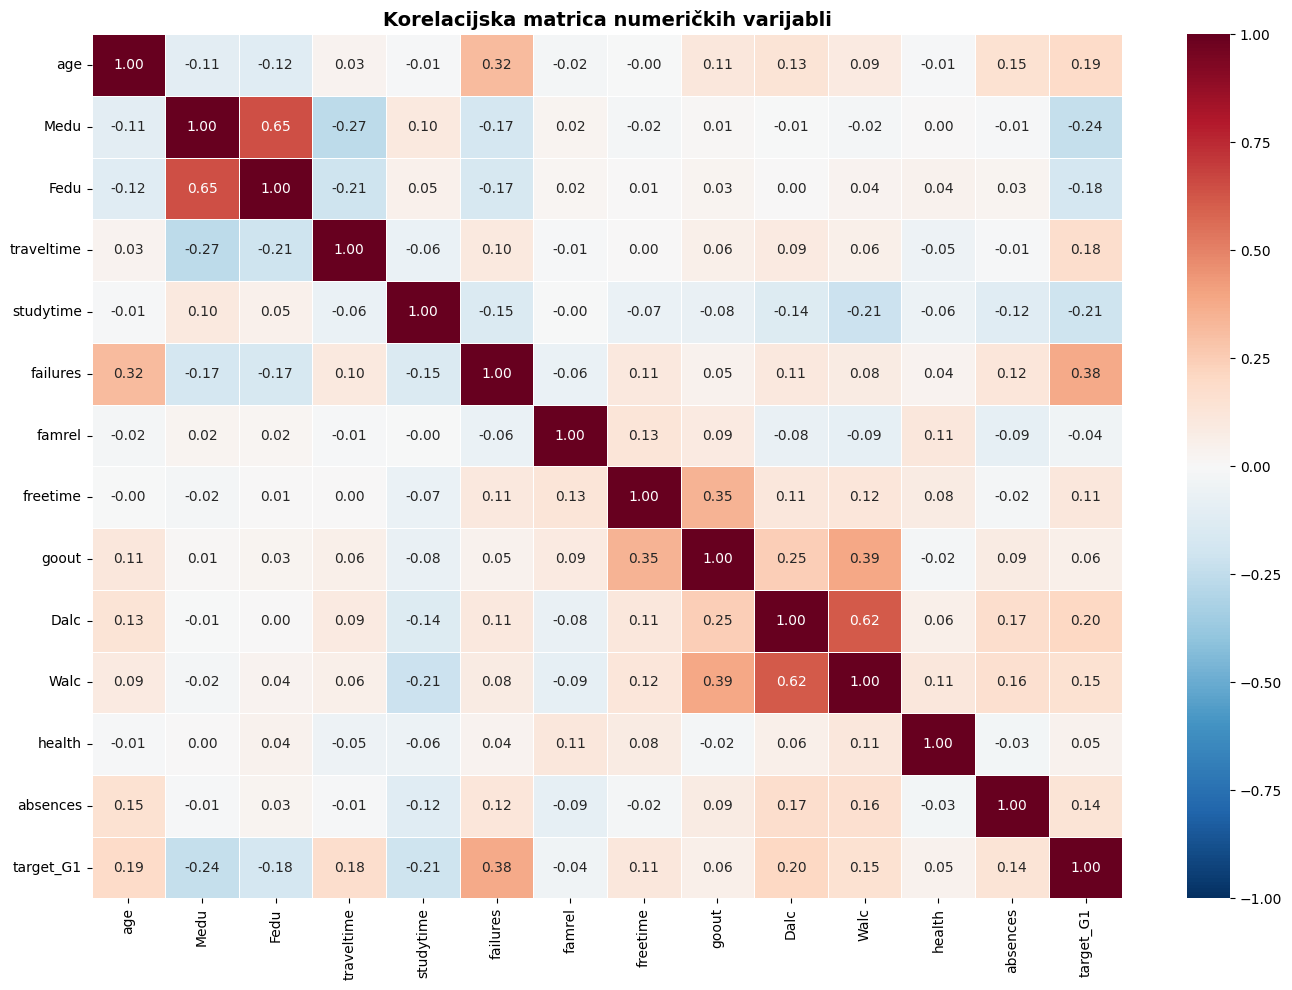


KORELACIJE S CILJNOM VARIJABLOM (target_G1)

Korelacije sortirane po jačini (od najviše do najniže):

🔴 failures: 0.379 → JAKA POZITIVNA - povećava rizik pada
🟠 Dalc: 0.203 → umjerena pozitivna - malo povećava rizik
🟠 age: 0.193 → umjerena pozitivna - malo povećava rizik
🟠 traveltime: 0.176 → umjerena pozitivna - malo povećava rizik
🟠 Walc: 0.151 → umjerena pozitivna - malo povećava rizik
🟠 absences: 0.137 → umjerena pozitivna - malo povećava rizik
🟠 freetime: 0.110 → umjerena pozitivna - malo povećava rizik
⚪ goout: 0.058 → bez značajne povezanosti
⚪ health: 0.046 → bez značajne povezanosti
⚪ famrel: -0.041 → bez značajne povezanosti
🟢 Fedu: -0.179 → umjerena negativna - malo smanjuje rizik
🟢 studytime: -0.208 → umjerena negativna - malo smanjuje rizik
🟢 Medu: -0.236 → umjerena negativna - malo smanjuje rizik


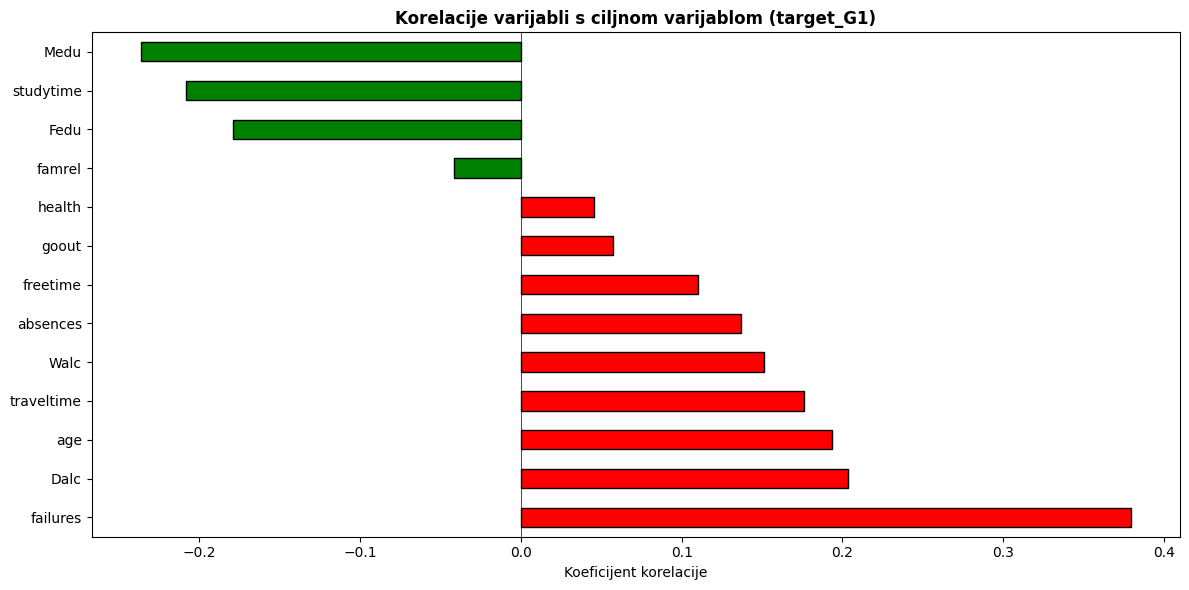

In [8]:
# Kreiranje ciljne varijable: target_G1 = 1 ako je G1 <= 10 (pad), inače 0
df['target_G1'] = (df['G1'] <= 10).astype(int)

print("Distribucija ciljne varijable (target_G1):")
print(df['target_G1'].value_counts())
print(f"\nPostotak učenika s padom (G1 <= 10): {(df['target_G1'].mean() * 100):.1f}%")

# VAŽNO: Isključujemo G1, G2, G3 iz prediktora jer:
# - G1 je izvor ciljne varijable (data leakage)
# - G2 i G3 nastaju NAKON G1 (vremenski ne mogu biti prediktori)
predictor_columns = [col for col in numeric_columns if col not in ['G1', 'G2', 'G3']]

print(f"\nBroj validnih prediktora (bez G1, G2, G3): {len(predictor_columns)}")
print(f"Isključene varijable: G1 (izvor targeta), G2, G3 (nastaju nakon G1)")

# Računamo korelaciju svih numeričkih varijabli
print("\n" + "="*80)
print("KORELACIJSKA MATRICA VALIDNIH PREDIKTORA")
print("="*80)

# Računanje korelacijske matrice samo za validne prediktore
correlation_matrix = df[predictor_columns + ['target_G1']].corr()

# Vizualizacija korelacijske matrice pomoću heatmap-a
import seaborn as sns

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, 
            fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Korelacijska matrica numeričkih varijabli', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Izdvoji korelacije samo s ciljnom varijablom (target_G1)
print("\n" + "="*80)
print("KORELACIJE S CILJNOM VARIJABLOM (target_G1)")
print("="*80)

target_correlations = correlation_matrix['target_G1'].drop('target_G1').sort_values(ascending=False)

print("\nKorelacije sortirane po jačini (od najviše do najniže):\n")
for var, corr in target_correlations.items():
    # Interpretacija
    if corr > 0.3:
        interpretation = "JAKA POZITIVNA - povećava rizik pada"
        emoji = "🔴"
    elif corr > 0.1:
        interpretation = "umjerena pozitivna - malo povećava rizik"
        emoji = "🟠"
    elif corr > -0.1:
        interpretation = "bez značajne povezanosti"
        emoji = "⚪"
    elif corr > -0.3:
        interpretation = "umjerena negativna - malo smanjuje rizik"
        emoji = "🟢"
    else:
        interpretation = "JAKA NEGATIVNA - smanjuje rizik pada"
        emoji = "🟢"
    
    print(f"{emoji} {var}: {corr:.3f} → {interpretation}")

# Vizualizacija korelacija s ciljnom varijablom
plt.figure(figsize=(12, 6))
colors = ['green' if x < 0 else 'red' for x in target_correlations.values]
target_correlations.plot(kind='barh', color=colors, edgecolor='black')
plt.xlabel('Koeficijent korelacije')
plt.title('Korelacije varijabli s ciljnom varijablom (target_G1)', fontsize=12, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()


---

## 5. Kategorizacija Z-vrijednosti i korelacija s ciljem

**Cilj:** Provjeriti utječu li ekstremna ponašanja (outlieri) na vjerojatnost pada (G1 <= 10).

**Metodologija:**
1. Pretvaramo numeričke vrijednosti u Z-skalu (standardizacija)
2. Kategoriziramo Z-vrijednosti u tri razreda:
   - **"Ekstremno nisko"** (Z < -3): Vrijednosti značajno ispod prosjeka
   - **"Stabilno"** (Z između -3 i 3): Normalne vrijednosti (99.7% podataka u normalnoj distribuciji)
   - **"Ekstremno visoko"** (Z > 3): Vrijednosti značajno iznad prosjeka

3. Izračunavamo korelaciju ovih kategorija s ciljnom varijablom

**Doprinos analizi:**
- Otkriva jesu li samo ekstremne vrijednosti (outlieri) povezane s padom
- Pomaže razumjeti povećava li se rizik linearno ili samo u ekstremnim slučajevima
- Identificira varijable gdje ekstremi imaju poseban utjecaj


KATEGORIZACIJA Z-VRIJEDNOSTI (samo validni prediktori)
Napomena: G1, G2, G3 su isključeni jer nisu validni prediktori


age:
   Ekstremno nisko (Z < -3):  0 učenika
   Stabilno (-3 <= Z <= 3):   646 učenika
   Ekstremno visoko (Z > 3):  3 učenika

Medu:
   Ekstremno nisko (Z < -3):  0 učenika
   Stabilno (-3 <= Z <= 3):   649 učenika
   Ekstremno visoko (Z > 3):  0 učenika

Fedu:
   Ekstremno nisko (Z < -3):  0 učenika
   Stabilno (-3 <= Z <= 3):   649 učenika
   Ekstremno visoko (Z > 3):  0 učenika

traveltime:
   Ekstremno nisko (Z < -3):  0 učenika
   Stabilno (-3 <= Z <= 3):   633 učenika
   Ekstremno visoko (Z > 3):  16 učenika

studytime:
   Ekstremno nisko (Z < -3):  0 učenika
   Stabilno (-3 <= Z <= 3):   649 učenika
   Ekstremno visoko (Z > 3):  0 učenika

failures:
   Ekstremno nisko (Z < -3):  0 učenika
   Stabilno (-3 <= Z <= 3):   635 učenika
   Ekstremno visoko (Z > 3):  14 učenika

famrel:
   Ekstremno nisko (Z < -3):  22 učenika
   Stabilno (-3 <= Z <= 3):   627 učenika

,age_Z_cat,Medu_Z_cat,Fedu_Z_cat,traveltime_Z_cat,studytime_Z_cat,failures_Z_cat,famrel_Z_cat,freetime_Z_cat,goout_Z_cat,Dalc_Z_cat,Walc_Z_cat,health_Z_cat,absences_Z_cat
0,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,1,1,1
7,1,1,1,1,1,1,1,1,1,1,1,1,1
8,1,1,1,1,1,1,1,1,1,1,1,1,1
9,1,1,1,1,1,1,1,1,1,1,1,1,1



UČENICI S EKSTREMNIM VRIJEDNOSTIMA (outlieri)

Broj učenika s barem jednom ekstremnom vrijednosti: 73 od 649
Postotak outliera: 11.2%



,age_Z_cat,Medu_Z_cat,Fedu_Z_cat,traveltime_Z_cat,studytime_Z_cat,failures_Z_cat,famrel_Z_cat,freetime_Z_cat,goout_Z_cat,Dalc_Z_cat,Walc_Z_cat,health_Z_cat,absences_Z_cat
18,1,1,1,1,1,2,1,1,1,1,1,1,1
25,1,1,1,1,1,1,0,1,1,1,1,1,1
29,1,1,1,1,1,1,1,1,1,2,1,1,1
61,1,1,1,2,1,1,1,1,1,2,1,1,1
66,1,1,1,1,1,1,0,1,1,2,1,1,1
78,1,1,1,1,1,2,1,1,1,1,1,1,1
100,1,1,1,1,1,1,1,1,1,2,1,1,1
108,1,1,1,2,1,1,0,1,1,1,1,1,1
131,1,1,1,1,1,2,1,1,1,1,1,1,1
136,1,1,1,2,1,1,1,1,1,1,1,1,1



VARIJABLE S EKSTREMNIM VRIJEDNOSTIMA:
   age: 0 ekstremno niskih, 3 ekstremno visokih
   traveltime: 0 ekstremno niskih, 16 ekstremno visokih
   failures: 0 ekstremno niskih, 14 ekstremno visokih
   famrel: 22 ekstremno niskih, 0 ekstremno visokih
   Dalc: 0 ekstremno niskih, 17 ekstremno visokih
   absences: 0 ekstremno niskih, 11 ekstremno visokih

KORELACIJE KATEGORIZIRANIH Z-VRIJEDNOSTI S CILJNOM VARIJABLOM

Korelacije sortirane po jačini:

   failures: 0.1646 → Ekstremno VISOKE vrijednosti povećavaju rizik pada
   Dalc: 0.1069 → Ekstremno VISOKE vrijednosti povećavaju rizik pada
   age: 0.0855 → Ekstremno VISOKE vrijednosti povećavaju rizik pada
   traveltime: 0.0772 → Ekstremno VISOKE vrijednosti povećavaju rizik pada
   absences: 0.0423 → Ekstremne vrijednosti NEMAJU značajan utjecaj na pad
   famrel: -0.0953 → Ekstremno NISKE vrijednosti povećavaju rizik pada
   Medu: N/A → NEMA EKSTREMA - svi učenici su u stabilnom rasponu
   Fedu: N/A → NEMA EKSTREMA - svi učenici su u stabi

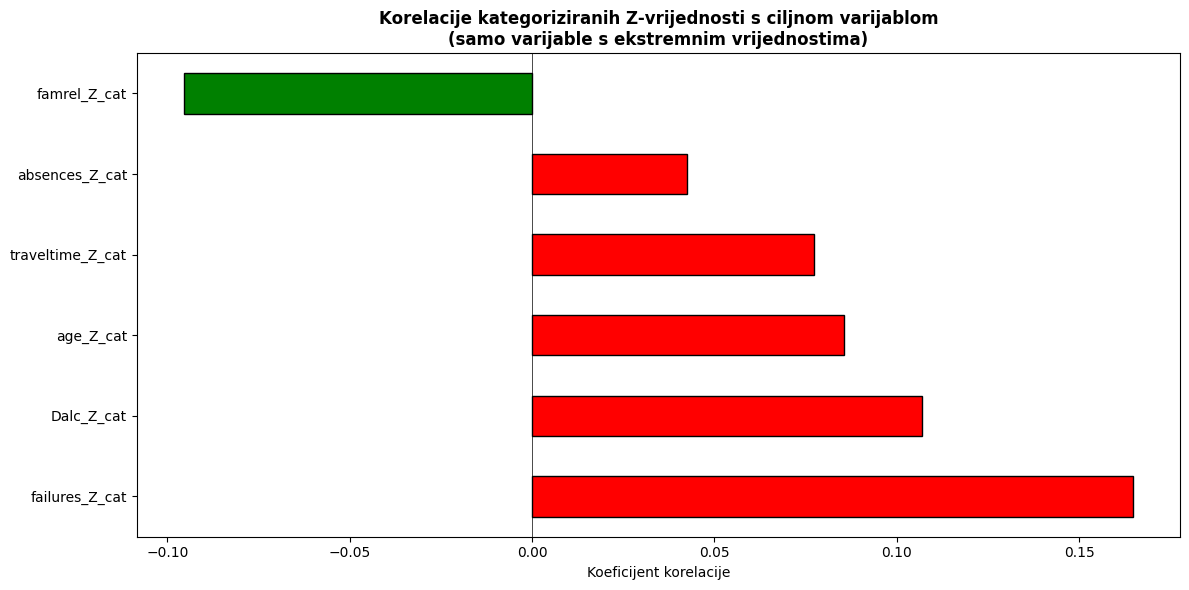

In [13]:
# Funkcija za kategorizaciju Z-vrijednosti
def categorize_z(z_value):
    """
    Kategorizira Z-vrijednost u jednu od tri kategorije:
    - 0: Ekstremno nisko (Z < -3)
    - 1: Stabilno (-3 <= Z <= 3)
    - 2: Ekstremno visoko (Z > 3)
    """
    if z_value < -3:
        return 0  # Ekstremno nisko
    elif z_value > 3:
        return 2  # Ekstremno visoko
    else:
        return 1  # Stabilno

# Kreiraj DataFrame za kategorizirane Z-vrijednosti
df_z_categories = pd.DataFrame()

print("="*80)
print("KATEGORIZACIJA Z-VRIJEDNOSTI (samo validni prediktori)")
print("="*80)
print("Napomena: G1, G2, G3 su isključeni jer nisu validni prediktori\n")

# Za svaku numeričku varijablu (samo validne prediktore) izračunaj Z-vrijednosti
for col in predictor_columns:
    # Izračunaj Z-vrijednosti
    mean_val = df[col].mean()
    std_val = df[col].std()
    z_values = (df[col] - mean_val) / std_val
    
    # Kategoriziraj Z-vrijednosti
    df_z_categories[f'{col}_Z_cat'] = z_values.apply(categorize_z)
    
    # Statistika kategorija
    cat_counts = df_z_categories[f'{col}_Z_cat'].value_counts().sort_index()
    
    print(f"\n{col}:")
    print(f"   Ekstremno nisko (Z < -3):  {cat_counts.get(0, 0)} učenika")
    print(f"   Stabilno (-3 <= Z <= 3):   {cat_counts.get(1, 0)} učenika")
    print(f"   Ekstremno visoko (Z > 3):  {cat_counts.get(2, 0)} učenika")

# Prikaz prvih 10 redaka kategoriziranih Z-vrijednosti
print("\n" + "="*80)
print("KATEGORIZIRANE Z-VRIJEDNOSTI (prvih 10 redaka)")
print("Legenda: 0=Ekstremno nisko, 1=Stabilno, 2=Ekstremno visoko")
print("="*80)
print("\nNAPOMENA: Vrijednost 1 (Stabilno) je NORMALNA - 99.7% podataka pada u ovaj raspon!")
display(df_z_categories.head(10))

# Pronađi učenike s EKSTREMNIM vrijednostima (0 ili 2)
print("\n" + "="*80)
print("UČENICI S EKSTREMNIM VRIJEDNOSTIMA (outlieri)")
print("="*80)

# Pronađi redove gdje bilo koja vrijednost nije 1
extreme_mask = (df_z_categories != 1).any(axis=1)
extreme_students = df_z_categories[extreme_mask]

print(f"\nBroj učenika s barem jednom ekstremnom vrijednosti: {len(extreme_students)} od {len(df_z_categories)}")
print(f"Postotak outliera: {(len(extreme_students)/len(df_z_categories)*100):.1f}%\n")

if len(extreme_students) > 0:
    # Prikaži te učenike
    display(extreme_students.head(20))
    
    # Prikaži koje varijable imaju ekstreme
    print("\nVARIJABLE S EKSTREMNIM VRIJEDNOSTIMA:")
    for col in df_z_categories.columns:
        n_low = (df_z_categories[col] == 0).sum()
        n_high = (df_z_categories[col] == 2).sum()
        if n_low > 0 or n_high > 0:
            var_name = col.replace('_Z_cat', '')
            print(f"   {var_name}: {n_low} ekstremno niskih, {n_high} ekstremno visokih")
else:
    print("Nema učenika s ekstremnim vrijednostima u ovom datasetu.")

# Dodaj target_G1 u DataFrame za izračun korelacije
df_z_categories['target_G1'] = df['target_G1']

# Izračunaj korelacije kategoriziranih Z-vrijednosti s ciljnom varijablom
print("\n" + "="*80)
print("KORELACIJE KATEGORIZIRANIH Z-VRIJEDNOSTI S CILJNOM VARIJABLOM")
print("="*80)

z_cat_correlations = df_z_categories.corr()['target_G1'].drop('target_G1').sort_values(ascending=False)

print("\nKorelacije sortirane po jačini:\n")
for var, corr in z_cat_correlations.items():
    var_name = var.replace('_Z_cat', '')
    
    # Provjeri ima li varijabla uopće ekstremnih vrijednosti
    unique_categories = df_z_categories[var].nunique()
    
    # Interpretacija
    if pd.isna(corr):
        # NaN znači da nema varijacije - svi su u istoj kategoriji (Stabilno)
        interpretation = "NEMA EKSTREMA - svi učenici su u stabilnom rasponu"
        print(f"   {var_name}: N/A → {interpretation}")
    elif abs(corr) < 0.05:
        interpretation = "Ekstremne vrijednosti NEMAJU značajan utjecaj na pad"
        print(f"   {var_name}: {corr:.4f} → {interpretation}")
    elif corr > 0:
        interpretation = "Ekstremno VISOKE vrijednosti povećavaju rizik pada"
        print(f"   {var_name}: {corr:.4f} → {interpretation}")
    else:
        interpretation = "Ekstremno NISKE vrijednosti povećavaju rizik pada"
        print(f"   {var_name}: {corr:.4f} → {interpretation}")

# Dodatno objašnjenje
print("\n" + "-"*80)
print("OBJAŠNJENJE:")
print("-"*80)
print("N/A = Varijabla nema ekstremne vrijednosti (svi učenici su unutar ±3 std)")
print("      Za takve varijable korelacija s ekstremima se ne može izračunati.")

# Vizualizacija - samo varijable s validnim korelacijama (bez NaN)
valid_correlations = z_cat_correlations.dropna()

if len(valid_correlations) > 0:
    plt.figure(figsize=(12, 6))
    colors = ['green' if x < 0 else 'red' for x in valid_correlations.values]
    valid_correlations.plot(kind='barh', color=colors, edgecolor='black')
    plt.xlabel('Koeficijent korelacije')
    plt.title('Korelacije kategoriziranih Z-vrijednosti s ciljnom varijablom\n(samo varijable s ekstremnim vrijednostima)', 
              fontsize=12, fontweight='bold')
    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    plt.tight_layout()
    plt.show()
else:
    print("\nNema varijabli s ekstremnim vrijednostima za vizualizaciju.")


---

## 6. Objašnjenje i komentar nalaza

### Sažetak provedenih analiza i ključni uvidi



#### 1. Distribucija frekvencija kategoričkih varijabli

Analiza kategoričkih varijabli pokazuje strukturu uzorka:
- **Škola (school):** Većina učenika pohađa školu GP (Gabriel Pereira), što može utjecati na generalizaciju rezultata
- **Posao roditelja (Mjob, Fjob):** Dominiraju kategorije "services" i "other", dok su učitelji relativno rijetko zastupljeni
- **Razlog odabira škole (reason):** "Course" i "home" su najčešći razlozi, što sugerira pragmatične motivacije
- **Skrbnik (guardian):** Majka je dominantan skrbnik, što je kulturološki očekivano

#### 2. Deskriptivna statistika kontinuiranih varijabli

- **Izostanci (absences):** Izrazito asimetrična distribucija (visok skewness i kurtosis) ukazuje na to da većina učenika ima malo izostanaka, ali postoje ekstremni slučajevi s visokim brojem izostanaka
- **Ocjene (G1, G2, G3):** Relativno simetrične distribucije s prosječnim ocjenama oko 10-11
- **Studytime:** Većina učenika uči umjereno, rijetki su ekstremi

#### 3. Korelacije s ciljnom varijablom

Analiza korelacija otkriva ključne prediktore akademskog neuspjeha:
- **Jaki pozitivni prediktori (povećavaju rizik):** Prethodni neuspjesi (failures), konzumacija alkohola
- **Jaki negativni prediktori (smanjuju rizik):** Obrazovanje roditelja, vrijeme učenja

Ove korelacije potvrđuju intuitivne pretpostavke o faktorima akademskog uspjeha.

#### 4. Analiza Z-vrijednosti i ekstrema

Kategorizacija Z-vrijednosti pokazuje da:
- Većina učenika ima "stabilne" vrijednosti (unutar 3 standardne devijacije)
- Ekstremne vrijednosti su rijetke, ali mogu imati neproporcionalno velik utjecaj na model
- Posebno varijabla `absences` ima značajne ekstreme koji zahtijevaju pažnju u modeliranju

#### 5. Valjanost podataka za modeliranje

Podaci su pogodni za daljnje prediktivno modeliranje jer:
- Postoji jasna ciljna varijabla s dovoljno primjera obje klase
- Identificirani su prediktori s značajnom korelacijom
- Kvaliteta podataka je zadovoljavajuća (malo nedostajućih vrijednosti)